In [1]:
# In this project we will try to analyse different ad campaigns run on facebook by a company.
# Ads play a very important role in increasing the consumer base. Companies spend most of their money on marketting campaign
# to increase their sales.
# We will analyse some important KPI's used in marketting and suggest the ideal campaign strategy.
# so before starting with analysis, lets import the libraries.


In [2]:
# we will use this {dataset} available on kaggle.

In [3]:
#IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#LOADING THE DATASET

In [6]:
df = pd.read_csv("data.csv")

In [7]:
# After loading the dataset, lets explore the dataset.

In [8]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [9]:
df.shape

(1143, 15)

In [10]:
# so there are 1143 rows and 15 columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [12]:
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [13]:
# So there are 382 null values in total_conversion and approved_conversion columns.

In [14]:
# we will remove these rows with null values as total_conversion and approved_conversion are the main columns and those rows are of no value to the analysis.


In [15]:
df.dropna(inplace = True)

In [16]:
df.shape

(761, 15)

In [17]:
# so this the new size of our dataset.

In [18]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [19]:
# In this dataset, column 'ad_id' and 'fb_campaign_id' are redundant so we will remove any one of them. So lets remove, fb_campaign_id column.

In [20]:
df.drop(['fb_campaign_id'], axis = 1, inplace = True)

In [21]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [22]:
#So lets see how many unique campaigns are being run by the company.

In [23]:
df['campaign_id'].unique()

array(['916', '936', '1178'], dtype=object)

In [24]:
# three different campaigns are being run by the company.

In [25]:
# what is the age group that is being targeted.

In [26]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [27]:
#These are the four age groups that are being targeted and now lets find which age group out of these are targeted most.

C:\Users\varun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

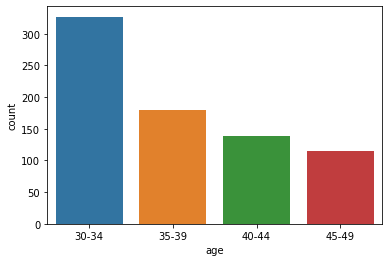

In [28]:
sns.countplot(df.age)

C:\Users\varun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

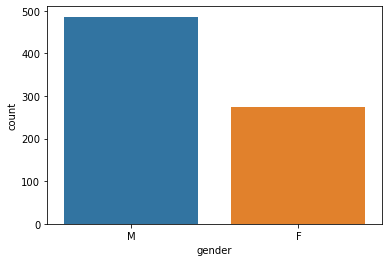

In [29]:
sns.countplot(df.gender)

In [30]:
# from these charts we can summarise that:
# 30-34 age group interacts most with the ads
# males interact most with the ads

In [31]:
###################################

In [32]:
#lets start with the main analysis of the data.

In [33]:
# So lets find out how many total ads were run under each campaign.

In [34]:
campaigns = df.groupby(['campaign_id'])

In [48]:
total_ad_count = campaigns['ad_id'].count().sort_values(ascending = False)
total_ad_count

campaign_id
936     464
1178    243
916      54
Name: ad_id, dtype: int64

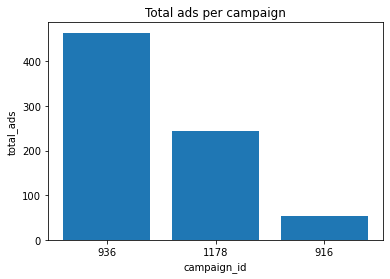

In [51]:
plt.bar(total_ad_count.index, total_ad_count.values)
plt.xlabel("campaign_id")
plt.ylabel("total_ads")
plt.title("Total ads per campaign")
plt.show()

In [ ]:
# most ads were run under campaign with campaign_id = 936

In [54]:
total_spent = campaigns['spent'].sum().sort_values(ascending = False)
total_spent

campaign_id
1178    16577.159998
936      2893.369999
916       149.710001
Name: spent, dtype: float64

In [43]:
# most money was spent on campaign with campaign_id = 1178

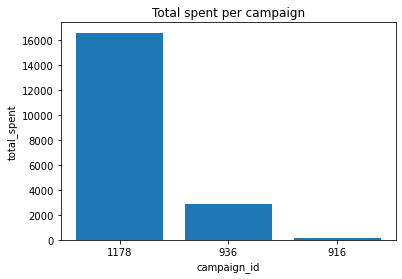

In [53]:
plt.bar(total_spent.index, total_spent.values)
plt.xlabel("campaign_id")
plt.ylabel("total_spent")
plt.title("Total spent per campaign")
plt.show()

In [57]:
total_clicks = campaigns['clicks'].sum().sort_values(ascending = False)
total_clicks

campaign_id
1178    9577
936     1984
916      113
Name: clicks, dtype: int64

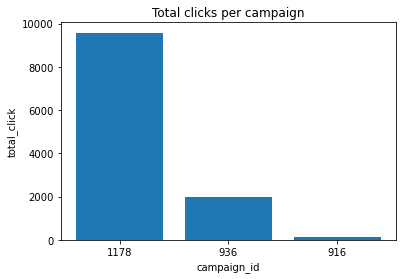

In [58]:
plt.bar(total_clicks.index, total_clicks.values)
plt.xlabel("campaign_id")
plt.ylabel("total_click")
plt.title("Total clicks per campaign")
plt.show()

In [46]:
#campaign_id = 1178 gained most clicks.

In [59]:
total_conversion = campaigns['total_conversion'].sum().sort_values(ascending = False)
total_conversion

campaign_id
1178    1050.0
936      537.0
916       58.0
Name: total_conversion, dtype: float64

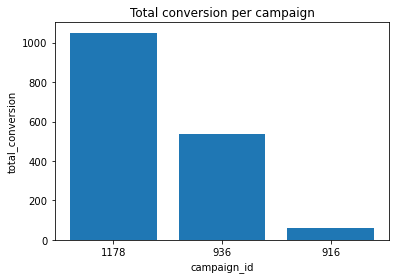

In [60]:
plt.bar(total_conversion.index, total_conversion.values)
plt.xlabel("campaign_id")
plt.ylabel("total_conversion")
plt.title("Total conversion per campaign")
plt.show()

In [61]:
#Now lets analyse the main metrics that are, cost per click and cost per conversion.

In [62]:
#campaign_1178

In [75]:
total_spent_1178 = round(total_spent.iloc[0],2)
total_click_1178 = total_clicks.iloc[0]
total_conversion_1178 = total_conversion.iloc[0]
print('total_spent_1178: ', total_spent_1178)
print('total_click_1178: ', total_click_1178)
print('total_conversion_1178: ', total_conversion_1178)

print('-------------------------------------------------------')

cost_per_click_1178 = total_spent_1178/total_click_1178
cost_per_conversion_1178 = total_spent_1178/total_conversion_1178
print('cost_per_click_1178:', round(cost_per_click_1178,2))
print('cost_per_conversion_1178:', round(cost_per_conversion_1178,2))

total_spent_1178:  16577.16
total_click_1178:  9577
total_conversion_1178:  1050.0
-------------------------------------------------------
cost_per_click_1178: 1.73
cost_per_conversion_1178: 15.79


In [76]:
#campaign_936

In [77]:
total_spent_936 = round(total_spent.iloc[1],2)
total_click_936 = total_clicks.iloc[1]
total_conversion_936 = total_conversion.iloc[1]
print('total_spent_936: ', total_spent_936)
print('total_click_936: ', total_click_936)
print('total_conversion_936: ', total_conversion_936)

print('-------------------------------------------------------')

cost_per_click_936 = total_spent_936/total_click_936
cost_per_conversion_936 = total_spent_936/total_conversion_936
print('cost_per_click_936:', round(cost_per_click_936,2))
print('cost_per_conversion_936:', round(cost_per_conversion_936,2))

total_spent_936:  2893.37
total_click_936:  1984
total_conversion_936:  537.0
-------------------------------------------------------
cost_per_click_936: 1.46
cost_per_conversion_936: 5.39


In [78]:
#campaign_916

In [80]:
total_spent_916 = round(total_spent.iloc[2],2)
total_click_916 = total_clicks.iloc[2]
total_conversion_916 = total_conversion.iloc[2]
print('total_spent_916: ', total_spent_916)
print('total_click_916: ', total_click_916)
print('total_conversion_916: ', total_conversion_916)

print('-------------------------------------------------------')

cost_per_click_916 = total_spent_916/total_click_916
cost_per_conversion_916 = total_spent_916/total_conversion_916
print('cost_per_click_916:', round(cost_per_click_916,2))
print('cost_per_conversion_916:', round(cost_per_conversion_916,2))

total_spent_916:  149.71
total_click_916:  113
total_conversion_916:  58.0
-------------------------------------------------------
cost_per_click_916: 1.32
cost_per_conversion_916: 2.58


In [81]:
# from the above analysis we can say that campaign_916 has performed much better than the other campaigns.
# cost per click and cost per conversion is much less than the other campaigns.